In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importando os dados de Internações
df_internacoes = pd.read_csv('C:\\Users\\jobsr\\OneDrive\\Documentos\\GitHub\\ProjetoIntegradorIII\\DATASUS\\Internacoes_Procedimento_Municipio\\2019-2022.csv', sep=';', encoding='latin-1')

In [5]:
df_internacoes.head()

,Ano,Trimestre,UID,Codigo_Municipio,Nome_Municipio,Coleta_Material,Diagnostico_Endoscopia,Metodos_Diagnosticos_Especialidades,Consultas_Atendimentos_Acompanhamentos,Tratamentos_Clinicos_Outras_Especialidades,...,Cirurgia_Toracica,Cirurgia_Reparadora,Cirurgia_Bucomaxilofacial,Outras_Cirurgias,Cirurgia_Oncologia,Coleta_Exames_Doacao_Orgaos_Tecidos_Celulas_Transplante,Acoes_Relacionadas_Doacao_Orgaos_Tecidos_Transplante,Processamento_Tecidos_Transplante,Transplante_Orgaos_Tecidos_Celulas,Acompanhamento_Intercorrencias_Pre_Pos_Transplante
0,2019,1,20191110001,110001,ALTA FLORESTA D'OESTE,0,0,0,12,439,...,1,0,0,23,2,0,1,0,0,1
1,2019,1,20191110002,110002,ARIQUEMES,0,0,0,258,575,...,16,8,0,90,3,0,1,0,4,2
2,2019,1,20191110003,110003,CABIXI,0,0,0,12,80,...,0,1,0,2,1,0,0,0,0,0
3,2019,1,20191110004,110004,CACOAL,3,0,0,70,786,...,7,0,2,59,11,0,2,0,1,1
4,2019,1,20191110005,110005,CEREJEIRAS,0,0,0,29,177,...,1,0,0,7,3,0,0,0,0,3


In [6]:
# Alguns insights sobre os dados

# Quantidade de linhas e colunas
df_internacoes.shape

(89120, 35)

In [14]:
# Tipos de dados
df_internacoes.dtypes

Ano                                                           object
Trimestre                                                     object
UID                                                           object
Codigo_Municipio                                              object
Nome_Municipio                                                object
Coleta_Material                                                int64
Diagnostico_Endoscopia                                         int64
Metodos_Diagnosticos_Especialidades                            int64
Consultas_Atendimentos_Acompanhamentos                         int64
Tratamentos_Clinicos_Outras_Especialidades                     int64
Tratamento_Oncologia                                           int64
Tratamento_Nefrologia                                          int64
Tratamento_Lesoes_Envenenamentos_Outros_Causas_Externas        int64
Parto_Nascimento                                               int64
Pequenas_Cirurgias_Pele_Tecido_Sub

In [12]:
# Alterar o tipo de dado das colunas 'Ano', 'Trimestre', 'UID' para string
df_internacoes['Ano'] = df_internacoes['Ano'].astype(str)
df_internacoes['Trimestre'] = df_internacoes['Trimestre'].astype(str)
df_internacoes['UID'] = df_internacoes['UID'].astype(str)
df_internacoes['Codigo_Municipio'] = df_internacoes['Codigo_Municipio'].astype(str)

In [15]:
# Verificar se existem valores nulos
df_internacoes.isnull().sum()

Ano                                                           0
Trimestre                                                     0
UID                                                           0
Codigo_Municipio                                              0
Nome_Municipio                                                0
Coleta_Material                                               0
Diagnostico_Endoscopia                                        0
Metodos_Diagnosticos_Especialidades                           0
Consultas_Atendimentos_Acompanhamentos                        0
Tratamentos_Clinicos_Outras_Especialidades                    0
Tratamento_Oncologia                                          0
Tratamento_Nefrologia                                         0
Tratamento_Lesoes_Envenenamentos_Outros_Causas_Externas       0
Parto_Nascimento                                              0
Pequenas_Cirurgias_Pele_Tecido_Subcutaneo_Mucosa              0
Cirurgia_Glandulas_Endocrinas           

In [23]:
# Determinar o total de procedimentos realizados por ano em cada município
total_coleta_material = df_internacoes.groupby(['Ano', 'Nome_Municipio'])['Coleta_Material', 'Diagnostico_Endoscopia'].sum()

# Somar o total de procedimentos realizados por ano em cada município
total_coleta_material = total_coleta_material.groupby(['Ano']).sum()

print(total_coleta_material)


      Coleta_Material  Diagnostico_Endoscopia
Ano                                          
2019            11771                    7767
2020             9720                    6550
2021            10192                    7878
2022            11743                    8810


C:\Users\jobsr\AppData\Local\Temp\ipykernel_18364\2824595761.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_coleta_material = df_internacoes.groupby(['Ano', 'Nome_Municipio'])['Coleta_Material', 'Diagnostico_Endoscopia'].sum()


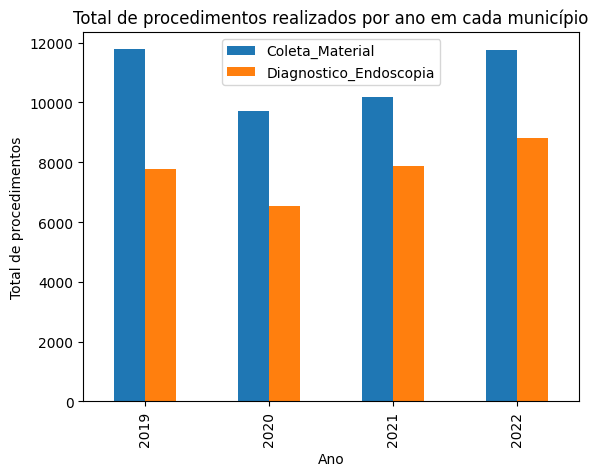

In [24]:
# Montar um gráfico de barras com o total de procedimentos realizados por ano em cada município

# Criar um gráfico de barras
total_coleta_material.plot.bar()

# Definir o título do gráfico
plt.title('Total de procedimentos realizados por ano em cada município')

# Definir o nome do eixo x
plt.xlabel('Ano')

# Definir o nome do eixo y
plt.ylabel('Total de procedimentos')

# Exibir o gráfico
plt.show()

In [63]:
# Criar uma lista com todos os procedimentos de Cirurgia
Cirurgias = ['Cirurgia_Glandulas_Endocrinas', 'Cirurgia_Sistema_Nervoso_Central_Periferico', 'Cirurgia_Vias_Aereas_Superiores_Face_Cabeca_Pescoco', 'Cirurgia_Aparelho_Visao', 'Cirurgia_Aparelho_Circulatorio', 'Cirurgia_Aparelho_Digestivo_Orgaos_Anexos_Parede_Abdominal', 'Cirurgia_Sistema_Osteomuscular', 'Cirurgia_Aparelho_Geniturinario', 'Cirurgia_Mama', 'Cirurgia_Obstetrica', 'Cirurgia_Toracica', 'Cirurgia_Reparadora', 'Cirurgia_Bucomaxilofacial', 'Outras_Cirurgias', 'Cirurgia_Oncologia']

# Somar o total de cirurgias realizadas por ano em cada município
total_cirurgias = df_internacoes.groupby(['Ano', 'Nome_Municipio'])[Cirurgias].sum()

print(total_cirurgias)

                          Cirurgia_Glandulas_Endocrinas  \
Ano  Nome_Municipio                                       
2019 ABADIA DE GOIAS                                  1   
     ABADIA DOS DOURADOS                              2   
     ABADIANIA                                        0   
     ABAETE                                           3   
     ABAETETUBA                                       6   
...                                                 ...   
2022 XIQUE-XIQUE                                      4   
     ZABELE                                           0   
     ZACARIAS                                         0   
     ZE DOCA                                          2   
     ZORTEA                                           0   

                          Cirurgia_Sistema_Nervoso_Central_Periferico  \
Ano  Nome_Municipio                                                     
2019 ABADIA DE GOIAS                                                2   
     ABADIA D

In [64]:
# Somar o total de cirurgias realizadas por ano em cada município
total_cirurgias = total_cirurgias.groupby(['Ano']).sum()

print(total_cirurgias)



      Cirurgia_Glandulas_Endocrinas  \
Ano                                   
2019                          12629   
2020                           6421   
2021                           7061   
2022                          11300   

      Cirurgia_Sistema_Nervoso_Central_Periferico  \
Ano                                                 
2019                                        92793   
2020                                        73104   
2021                                        76253   
2022                                        93617   

      Cirurgia_Vias_Aereas_Superiores_Face_Cabeca_Pescoco  \
Ano                                                         
2019                                             137585     
2020                                              85428     
2021                                              91735     
2022                                             121374     

      Cirurgia_Aparelho_Visao  Cirurgia_Aparelho_Circulatorio  \
Ano           

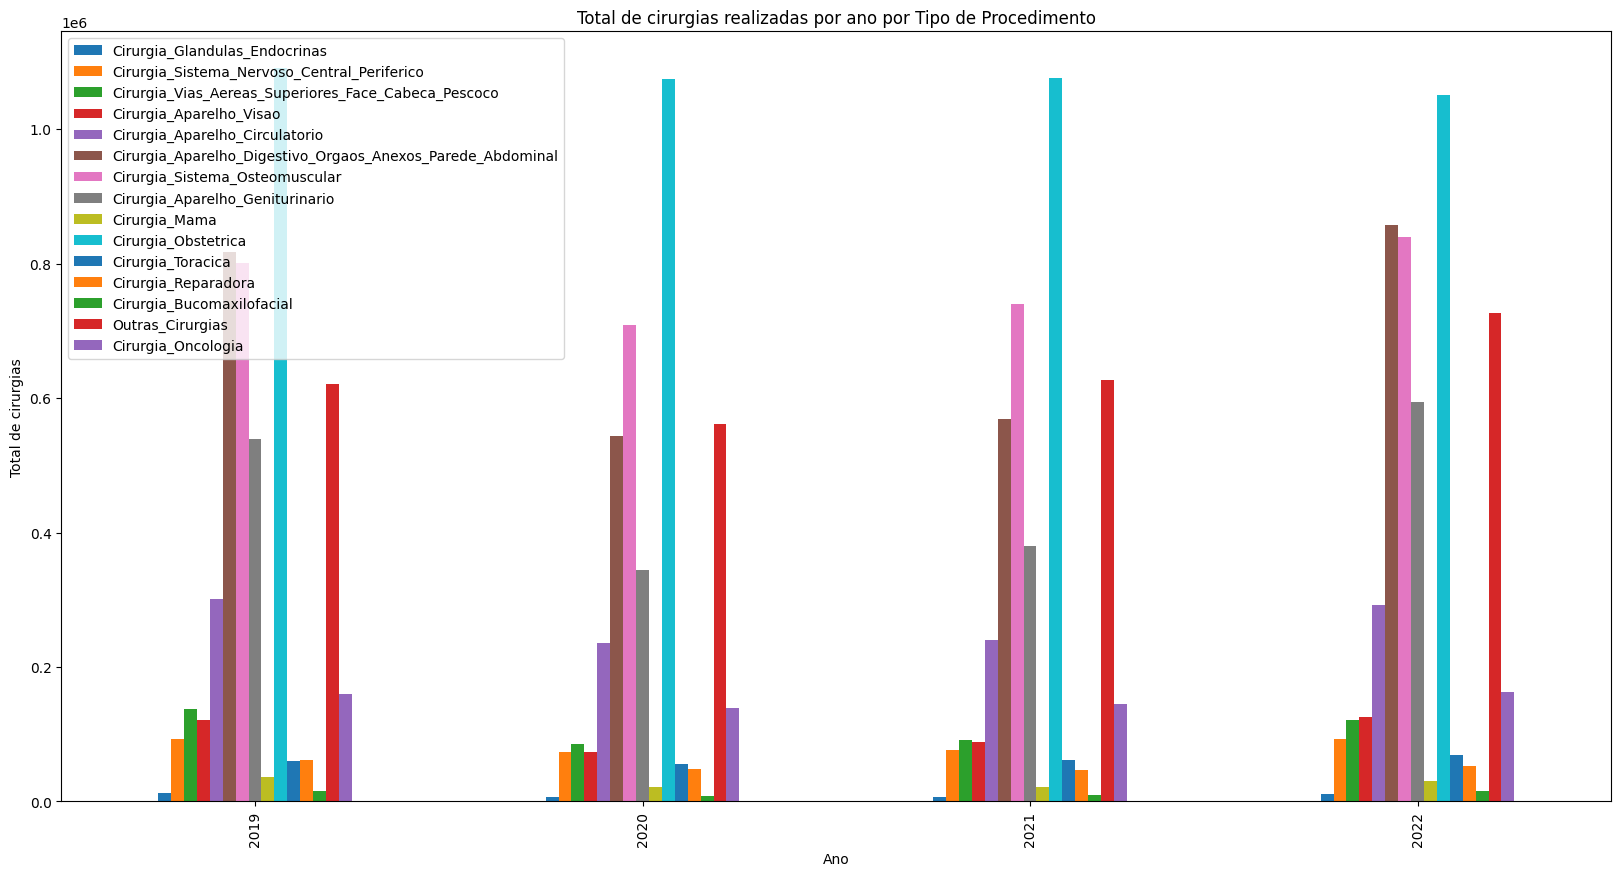

In [37]:
# Montar um gráfico com o total de cirurgias realizadas por ano em cada município. Escolher o melhor tipo de gráfico para representar os dados.

# Criar um gráfico de barras
total_cirurgias.plot.bar(figsize=(20,10))

# Definir o título do gráfico
plt.title('Total de cirurgias realizadas por ano por Tipo de Procedimento')

# Definir o nome do eixo x
plt.xlabel('Ano')

# Definir o nome do eixo y
plt.ylabel('Total de cirurgias')

# Exibir o gráfico
plt.show()